<b>Persistency of a Drug</b>

<b>Business Understanding</b>

<i>Problem Statement:</i>

One of the challenge for all Pharmaceutical companies is to understand the persistency of drug as per the physician prescription. To solve this problem ABC pharma company approached an analytics company to automate this process of identification.

<i>ML Problem:</i>

With an objective to gather insights on the factors that are impacting the persistency, build a classification for the given dataset.

<i>Target Variable:</i> Persistency_Flag

<i>Task:</i>

Problem understanding
Data Understanding
Data Cleaning and Feature engineering
Model Development
Model Selection
Model Evaluation
Report the accuracy, precision and recall of both the class of target variable
Report ROC-AUC as well
Deploy the model
Explain the challenges and model selection

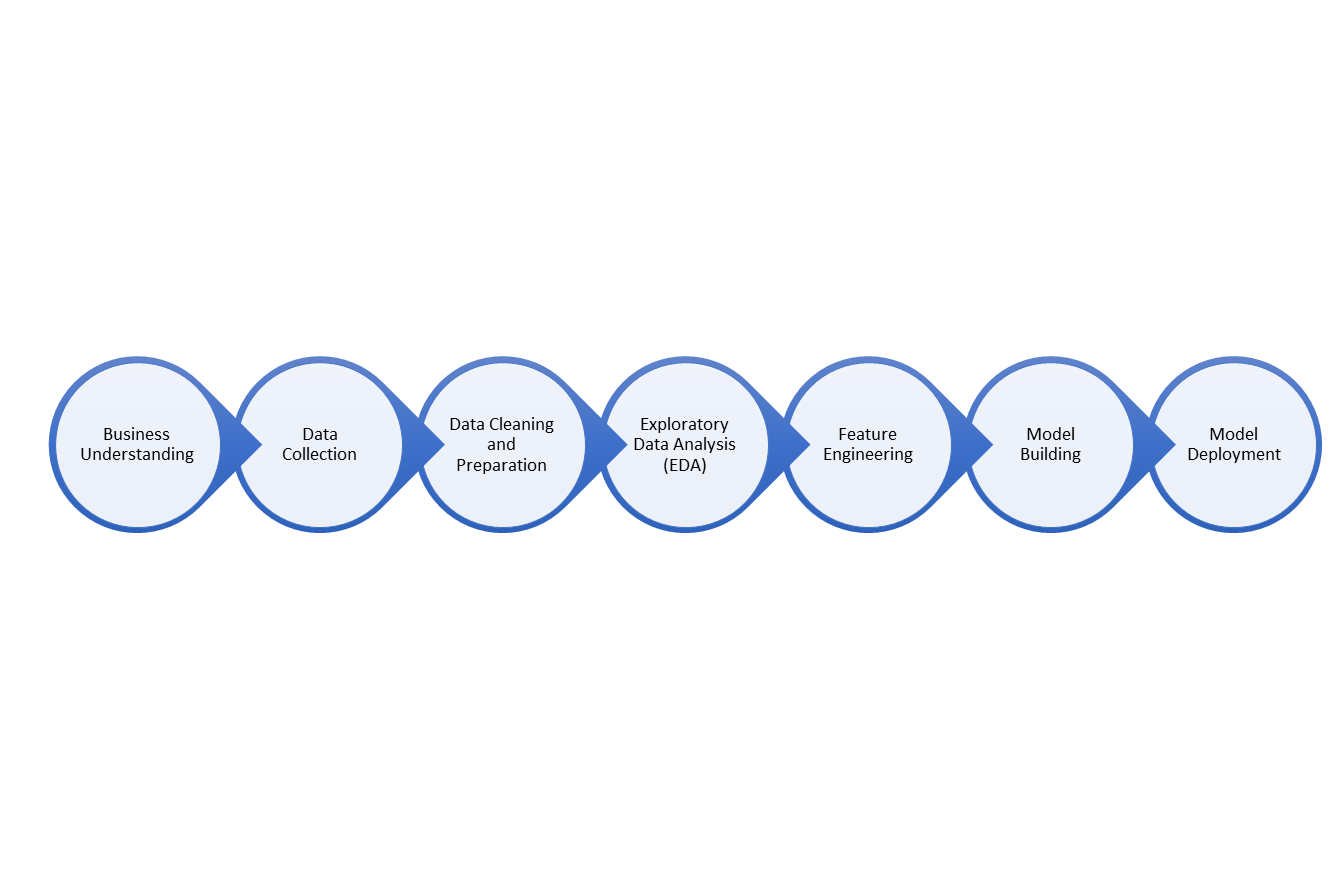

___

<b>Data Collection</b>

<b>Import Libraries</b>

In [45]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline


<b>Read the Excel file</b>

In [3]:
df = pd.read_excel("Healthcare_dataset.xlsx", sheet_name= 'Dataset')
df_description = pd.read_excel("Healthcare_dataset.xlsx", sheet_name= 'Feature Description')

This variable displays a description sheet within the .xlsx file 

In [90]:
df_description

,Bucket,Variable,Variable Description
0,Unique Row Id,Patient ID,Unique ID of each patient
1,Target Variable,Persistency_Flag,Flag indicating if a patient was persistent or...
2,Demographics,Age,Age of the patient during their therapy
3,NaN,Race,Race of the patient from the patient table
4,NaN,Region,Region of the patient from the patient table
5,NaN,Ethnicity,Ethnicity of the patient from the patient table
6,NaN,Gender,Gender of the patient from the patient table
7,NaN,IDN Indicator,Flag indicating patients mapped to IDN
8,Provider Attributes,NTM - Physician Specialty,Specialty of the HCP that prescribed the NTM Rx
9,Clinical Factors,NTM - T-Score,T Score of the patient at the time of the NTM ...


<b>Size of the Dataframe</b>

In [5]:
# Dataframe size (row, columns)
df.shape

(3424, 69)

<b>List the columns in the Dataframe</b>

In [6]:
df_columns = list(df.columns)
df.columns

Index(['Ptid', 'Persistency_Flag', 'Gender', 'Race', 'Ethnicity', 'Region',
       'Age_Bucket', 'Ntm_Speciality', 'Ntm_Specialist_Flag',
       'Ntm_Speciality_Bucket', 'Gluco_Record_Prior_Ntm',
       'Gluco_Record_During_Rx', 'Dexa_Freq_During_Rx', 'Dexa_During_Rx',
       'Frag_Frac_Prior_Ntm', 'Frag_Frac_During_Rx', 'Risk_Segment_Prior_Ntm',
       'Tscore_Bucket_Prior_Ntm', 'Risk_Segment_During_Rx',
       'Tscore_Bucket_During_Rx', 'Change_T_Score', 'Change_Risk_Segment',
       'Adherent_Flag', 'Idn_Indicator', 'Injectable_Experience_During_Rx',
       'Comorb_Encounter_For_Screening_For_Malignant_Neoplasms',
       'Comorb_Encounter_For_Immunization',
       'Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx',
       'Comorb_Vitamin_D_Deficiency',
       'Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified',
       'Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx',
       'Comorb_Long_Term_Current_Drug_Therapy', 'Comorb_Dorsalgia',
       'Com

<b>Show the first 5 rows of the Dataframe</b>

In [7]:
df.head()

,Ptid,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,...,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
0,P1,Persistent,Male,Caucasian,Not Hispanic,West,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
1,P2,Non-Persistent,Male,Asian,Not Hispanic,West,55-65,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
2,P3,Non-Persistent,Female,Other/Unknown,Hispanic,Midwest,65-75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,Y,N,N,N,N,N,N,N,2
3,P4,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,1
4,P5,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,1


<b>Dataframe datatypes</b>

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3424 entries, 0 to 3423
Data columns (total 69 columns):
 #   Column                                                              Non-Null Count  Dtype 
---  ------                                                              --------------  ----- 
 0   Ptid                                                                3424 non-null   object
 1   Persistency_Flag                                                    3424 non-null   object
 2   Gender                                                              3424 non-null   object
 3   Race                                                                3424 non-null   object
 4   Ethnicity                                                           3424 non-null   object
 5   Region                                                              3424 non-null   object
 6   Age_Bucket                                                          3424 non-null   object
 7   Ntm_Speciality          

___

<b> Data Cleaning and Preparation</b>

<i><b>Check for any NaN Values</b></i>

In [9]:
df.isnull().sum().value_counts()

0    69
Name: count, dtype: int64

<i>There are no NaN Values in the Dataframe</i>

<i><b>Check for Duplicated values</b></i>

In [10]:
df.duplicated().value_counts()

False    3424
Name: count, dtype: int64

<i> There are no duplicated values in the Dataframe</i>

<i><b>Convert Dataframe to lowercase</b></i>

In [11]:
df_lower = df.applymap(lambda x: x.lower() if isinstance(x, str) else x)
df_lower.columns = df_lower.columns.str.lower()

In [84]:
pd.set_option('display.max_columns', None)
df_lower

,ptid,persistency_flag,gender,race,ethnicity,region,age_bucket,ntm_speciality,ntm_specialist_flag,ntm_speciality_bucket,gluco_record_prior_ntm,gluco_record_during_rx,dexa_freq_during_rx,dexa_during_rx,frag_frac_prior_ntm,frag_frac_during_rx,risk_segment_prior_ntm,tscore_bucket_prior_ntm,risk_segment_during_rx,tscore_bucket_during_rx,change_t_score,change_risk_segment,adherent_flag,idn_indicator,injectable_experience_during_rx,comorb_encounter_for_screening_for_malignant_neoplasms,comorb_encounter_for_immunization,"comorb_encntr_for_general_exam_w_o_complaint,_susp_or_reprtd_dx",comorb_vitamin_d_deficiency,comorb_other_joint_disorder_not_elsewhere_classified,comorb_encntr_for_oth_sp_exam_w_o_complaint_suspected_or_reprtd_dx,comorb_long_term_current_drug_therapy,comorb_dorsalgia,comorb_personal_history_of_other_diseases_and_conditions,comorb_other_disorders_of_bone_density_and_structure,comorb_disorders_of_lipoprotein_metabolism_and_other_lipidemias,comorb_osteoporosis_without_current_pathological_fracture,comorb_personal_history_of_malignant_neoplasm,comorb_gastro_esophageal_reflux_disease,concom_cholesterol_and_triglyceride_regulating_preparations,concom_narcotics,concom_systemic_corticosteroids_plain,concom_anti_depressants_and_mood_stabilisers,concom_fluoroquinolones,concom_cephalosporins,concom_macrolides_and_similar_types,concom_broad_spectrum_penicillins,concom_anaesthetics_general,concom_viral_vaccines,risk_type_1_insulin_dependent_diabetes,risk_osteogenesis_imperfecta,risk_rheumatoid_arthritis,risk_untreated_chronic_hyperthyroidism,risk_untreated_chronic_hypogonadism,risk_untreated_early_menopause,risk_patient_parent_fractured_their_hip,risk_smoking_tobacco,risk_chronic_malnutrition_or_malabsorption,risk_chronic_liver_disease,risk_family_history_of_osteoporosis,risk_low_calcium_intake,risk_vitamin_d_insufficiency,risk_poor_health_frailty,risk_excessive_thinness,risk_hysterectomy_oophorectomy,risk_estrogen_deficiency,risk_immobilization,risk_recurring_falls,count_of_risks
0,p1,persistent,male,caucasian,not hispanic,west,>75,general practitioner,others,ob/gyn/others/pcp/unknown,n,n,0,n,n,n,vlr_lr,>-2.5,vlr_lr,<=-2.5,no change,unknown,adherent,n,y,n,y,y,n,n,y,n,y,y,n,n,n,n,n,n,n,n,n,n,n,n,n,n,n,n,n,n,n,n,n,n,n,n,n,n,n,n,n,n,n,n,n,n,0
1,p2,non-persistent,male,asian,not hispanic,west,55-65,general practitioner,others,ob/gyn/others/pcp/unknown,n,n,0,n,n,n,vlr_lr,>-2.5,unknown,unknown,unknown,unknown,adherent,n,y,n,n,y,n,n,n,n,n,n,n,n,n,n,n,n,n,n,n,n,n,n,n,n,n,n,n,n,n,n,n,n,n,n,n,n,n,n,n,n,n,n,n,n,0
2,p3,non-persistent,female,other/unknown,hispanic,midwest,65-75,general practitioner,others,ob/gyn/others/pcp/unknown,n,n,0,n,n,n,hr_vhr,<=-2.5,hr_vhr,<=-2.5,no change,no change,adherent,n,y,y,n,y,n,n,n,n,n,n,n,n,n,n,n,y,n,n,n,n,n,n,n,n,n,n,n,n,n,n,n,y,n,n,n,n,y,n,n,n,n,n,n,n,2
3,p4,non-persistent,female,caucasian,not hispanic,midwest,>75,general practitioner,others,ob/gyn/others/pcp/unknown,n,y,0,n,n,n,hr_vhr,>-2.5,hr_vhr,<=-2.5,no change,no change,adherent,n,y,n,y,y,n,y,n,n,y,n,n,y,n,n,y,n,y,y,n,n,n,n,n,n,y,n,n,n,n,n,n,n,y,n,n,n,n,n,n,n,n,n,n,n,1
4,p5,non-persistent,female,caucasian,not hispanic,midwest,>75,general practitioner,others,ob/gyn/others/pcp/unknown,y,y,0,n,n,n,hr_vhr,<=-2.5,unknown,unknown,unknown,unknown,adherent,n,y,y,y,y,n,n,n,n,y,y,n,n,n,n,n,n,y,y,y,n,n,n,n,n,n,n,n,n,n,n,n,n,y,n,n,n,n,n,n,n,n,n,n,n,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3419,p3420,persistent,female,caucasian,not hispanic,south,>75,general practitioner,others,ob/gyn/others/pcp/unknown,n,n,0,n,n,n,vlr_lr,>-2.5,unknown,unknown,unknown,unknown,adherent,y,y,y,n,y,y,n,n,n,y,n,y,y,n,n,y,y,y,y,y,y,n,n,n,n,n,n,n,n,n,n,n,n,n,n,n,n,n,y,n,n,n,n,n,n,1
3420,p3421,persistent,female,caucasian,not hispanic,south,>75,unknown,o

<b>Convert 'n' and 'y' to 0 and 1 respectively</b>

In [98]:
"""
To fit the Dataframe below into a model, we need to convert the "y" and "n" values into numbers; 
{"n" : 0}
{"y" : 1}

Having the numerical values, we can further analyze the data, and help prepare for modeling.

"""
;

''

In [96]:
# df_lower.filter(like='risk', axis=1).drop(columns=['risk_segment_prior_ntm', 'risk_segment_during_rx', 'change_risk_segment']).replace({'n': 0, 'y': 1})

In [93]:
def binary(df):
    for column in df_lower.columns:
        if set(df[column].unique()) == {'n','y'}:
            df[column] = df[column].replace({'n' : 0 , 'y' : 1})
    return df

In [95]:
binary(df_lower)
df_lower

,ptid,persistency_flag,gender,race,ethnicity,region,age_bucket,ntm_speciality,ntm_specialist_flag,ntm_speciality_bucket,gluco_record_prior_ntm,gluco_record_during_rx,dexa_freq_during_rx,dexa_during_rx,frag_frac_prior_ntm,frag_frac_during_rx,risk_segment_prior_ntm,tscore_bucket_prior_ntm,risk_segment_during_rx,tscore_bucket_during_rx,change_t_score,change_risk_segment,adherent_flag,idn_indicator,injectable_experience_during_rx,comorb_encounter_for_screening_for_malignant_neoplasms,comorb_encounter_for_immunization,"comorb_encntr_for_general_exam_w_o_complaint,_susp_or_reprtd_dx",comorb_vitamin_d_deficiency,comorb_other_joint_disorder_not_elsewhere_classified,comorb_encntr_for_oth_sp_exam_w_o_complaint_suspected_or_reprtd_dx,comorb_long_term_current_drug_therapy,comorb_dorsalgia,comorb_personal_history_of_other_diseases_and_conditions,comorb_other_disorders_of_bone_density_and_structure,comorb_disorders_of_lipoprotein_metabolism_and_other_lipidemias,comorb_osteoporosis_without_current_pathological_fracture,comorb_personal_history_of_malignant_neoplasm,comorb_gastro_esophageal_reflux_disease,concom_cholesterol_and_triglyceride_regulating_preparations,concom_narcotics,concom_systemic_corticosteroids_plain,concom_anti_depressants_and_mood_stabilisers,concom_fluoroquinolones,concom_cephalosporins,concom_macrolides_and_similar_types,concom_broad_spectrum_penicillins,concom_anaesthetics_general,concom_viral_vaccines,risk_type_1_insulin_dependent_diabetes,risk_osteogenesis_imperfecta,risk_rheumatoid_arthritis,risk_untreated_chronic_hyperthyroidism,risk_untreated_chronic_hypogonadism,risk_untreated_early_menopause,risk_patient_parent_fractured_their_hip,risk_smoking_tobacco,risk_chronic_malnutrition_or_malabsorption,risk_chronic_liver_disease,risk_family_history_of_osteoporosis,risk_low_calcium_intake,risk_vitamin_d_insufficiency,risk_poor_health_frailty,risk_excessive_thinness,risk_hysterectomy_oophorectomy,risk_estrogen_deficiency,risk_immobilization,risk_recurring_falls,count_of_risks
0,p1,persistent,male,caucasian,not hispanic,west,>75,general practitioner,others,ob/gyn/others/pcp/unknown,0,0,0,0,0,0,vlr_lr,>-2.5,vlr_lr,<=-2.5,no change,unknown,adherent,0,1,0,1,1,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,p2,non-persistent,male,asian,not hispanic,west,55-65,general practitioner,others,ob/gyn/others/pcp/unknown,0,0,0,0,0,0,vlr_lr,>-2.5,unknown,unknown,unknown,unknown,adherent,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,p3,non-persistent,female,other/unknown,hispanic,midwest,65-75,general practitioner,others,ob/gyn/others/pcp/unknown,0,0,0,0,0,0,hr_vhr,<=-2.5,hr_vhr,<=-2.5,no change,no change,adherent,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,2
3,p4,non-persistent,female,caucasian,not hispanic,midwest,>75,general practitioner,others,ob/gyn/others/pcp/unknown,0,1,0,0,0,0,hr_vhr,>-2.5,hr_vhr,<=-2.5,no change,no change,adherent,0,1,0,1,1,0,1,0,0,1,0,0,1,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
4,p5,non-persistent,female,caucasian,not hispanic,midwest,>75,general practitioner,others,ob/gyn/others/pcp/unknown,1,1,0,0,0,0,hr_vhr,<=-2.5,unknown,unknown,unknown,unknown,adherent,0,1,1,1,1,0,0,0,0,1,1,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3419,p3420,persistent,female,caucasian,not hispanic,south,>75,general practitioner,others,ob/gyn/others/pcp/unknown,0,0,0,0,0,0,vlr_lr,>-2.5,unknown,unknown,unknown,unknown,adherent,1,1,1,0,1,1,0,0,0,1,0,1,1,0,0,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
3420,p3421,persistent,female,caucasian,not hispanic,south,>75,unknown,o

In [82]:
df_lower.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3424 entries, 0 to 3423
Data columns (total 69 columns):
 #   Column                                                              Non-Null Count  Dtype 
---  ------                                                              --------------  ----- 
 0   ptid                                                                3424 non-null   object
 1   persistency_flag                                                    3424 non-null   object
 2   gender                                                              3424 non-null   object
 3   race                                                                3424 non-null   object
 4   ethnicity                                                           3424 non-null   object
 5   region                                                              3424 non-null   object
 6   age_bucket                                                          3424 non-null   object
 7   ntm_speciality          

<b>Remove unecessary columns from the Dataframe</b>

In [64]:
df_lower['ntm_specialist_flag'].value_counts()

ntm_specialist_flag
others        2013
specialist    1411
Name: count, dtype: int64

In [89]:
df_lower.describe(include = [np.number]).T

,count,mean,std,min,25%,50%,75%,max
dexa_freq_during_rx,3424.0,3.016063,8.136545,0.0,0.0,0.0,3.0,146.0
count_of_risks,3424.0,1.239486,1.094914,0.0,0.0,1.0,2.0,7.0


<b>Exploratory Data Analaysis (EDA) </b>

<i>Persistency flag</i>

In [18]:
df_lower['persistency_flag'].value_counts()

persistency_flag
non-persistent    2135
persistent        1289
Name: count, dtype: int64

<Axes: xlabel='persistency_flag'>

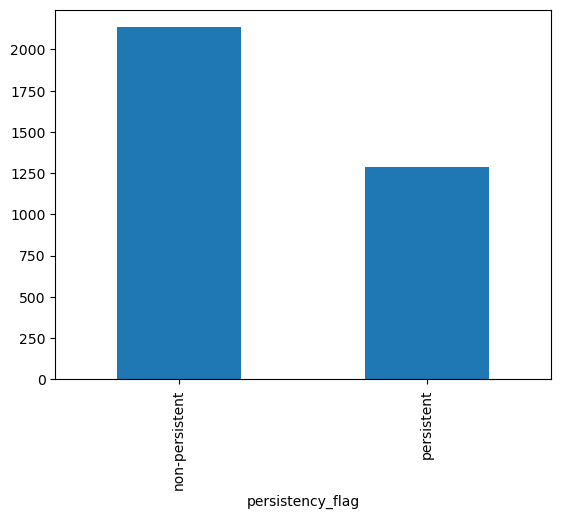

In [25]:
df_lower['persistency_flag'].value_counts().plot(kind='bar')

There seems to be an imbalance that needs to be corrected in the model building stage.

<i>Race</i>

In [23]:
race_count = df_lower['race'].value_counts().reset_index()
race_count.columns = ['race', 'count']
race_count['percentage'] = (race_count['count']/(race_count['count'].sum())) * 100

In [24]:
print(race_count)

               race  count  percentage
0         caucasian   3148   91.939252
1     other/unknown     97    2.832944
2  african american     95    2.774533
3             asian     84    2.453271


<Axes: xlabel='race'>

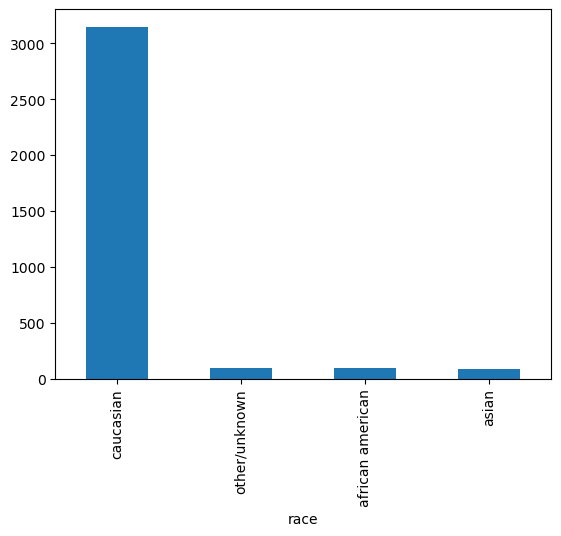

In [21]:
df_lower['race'].value_counts().plot(kind='bar')

Caucasian's are the most accounted race in the Dataset by 91.94%, followed by:<br> Other/Unknown 2.83% <br> African American 2.77% <br> Asian 2.45%

<i>Gender</i>

In [28]:
gender_count = df_lower['gender'].value_counts().reset_index()
gender_count.columns = ['gender', 'count']
gender_count['percentage'] = (gender_count['count']/(gender_count['count'].sum())) * 100

In [29]:
gender_count

,gender,count,percentage
0,female,3230,94.334112
1,male,194,5.665888


<Axes: xlabel='gender'>

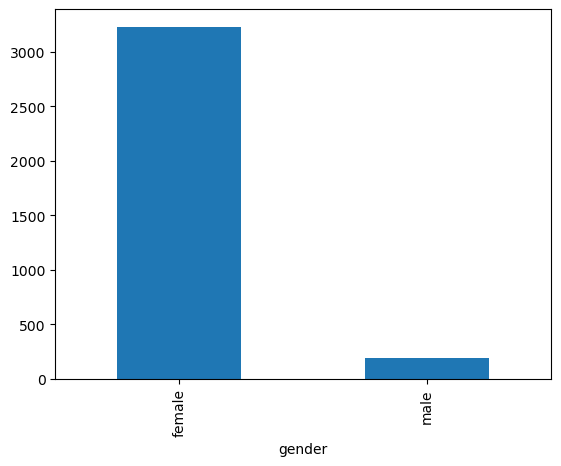

In [26]:
df_lower['gender'].value_counts().plot(kind='bar')

Female takes the majority count in the dataset by 3,230 (94.33%), whereas Male count is 194 (5.67%).

<i> Region </i>

In [33]:
region_count = df_lower['region'].value_counts().reset_index()
region_count.columns = ['region', 'count']
region_count['percentage'] = (region_count['count']/(region_count['count'].sum())) * 100

In [34]:
region_count

,region,count,percentage
0,midwest,1383,40.391355
1,south,1247,36.419393
2,west,502,14.661215
3,northeast,232,6.775701
4,other/unknown,60,1.752336


<Axes: xlabel='region'>

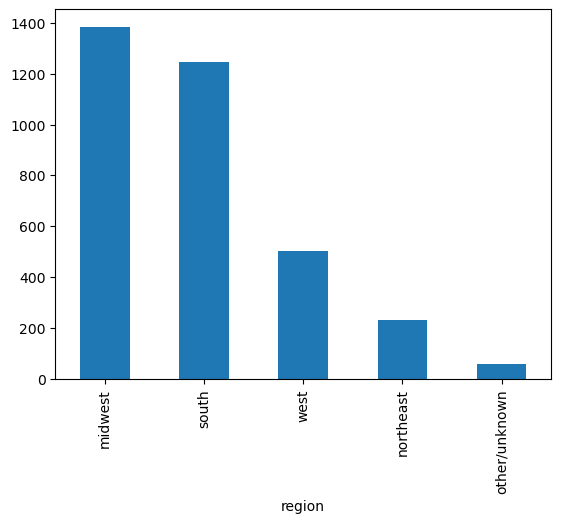

In [32]:
df_lower['region'].value_counts().plot(kind='bar')

The Midwest region is responsible of roughly 40.39% of the count from the Dataset.

<i>Age Bucket</i>

In [35]:
age_count = df_lower['age_bucket'].value_counts().reset_index()
age_count.columns = ['age', 'count']
age_count['percentage'] = (age_count['count']/(age_count['count'].sum())) * 100

In [36]:
age_count

,age,count,percentage
0,>75,1439,42.026869
1,65-75,1086,31.717290
2,55-65,733,21.407710
3,<55,166,4.848131


<Axes: xlabel='age_bucket'>

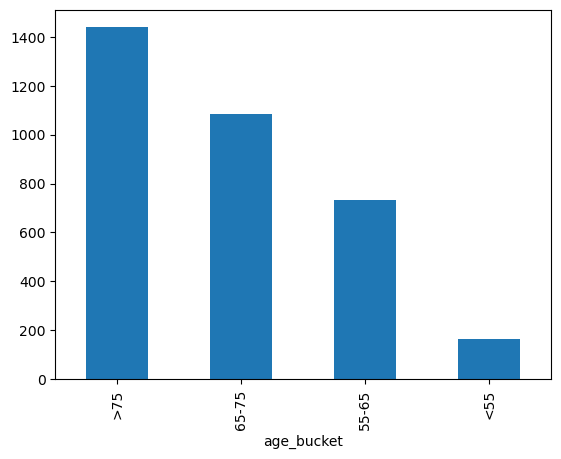

In [37]:
df_lower['age_bucket'].value_counts().plot(kind='bar')

Over the age of 75 takes the majority count in the Dataset by 42.02%.

<i>Race by Gender</i>

In [42]:
race_gender = df_lower.groupby(['race','gender'])['gender'].count().unstack().reset_index()
race_gender

gender,race,female,male
0,african american,91,4
1,asian,81,3
2,caucasian,2965,183
3,other/unknown,93,4


<i>Age by Gender</i>

In [44]:
age_gender = df_lower.groupby(['age_bucket','gender'])['gender'].count().unstack().reset_index()
age_gender

gender,age_bucket,female,male
0,55-65,710,23
1,65-75,1038,48
2,<55,148,18
3,>75,1334,105


<i>Specialty</i>

<Axes: ylabel='ntm_speciality'>

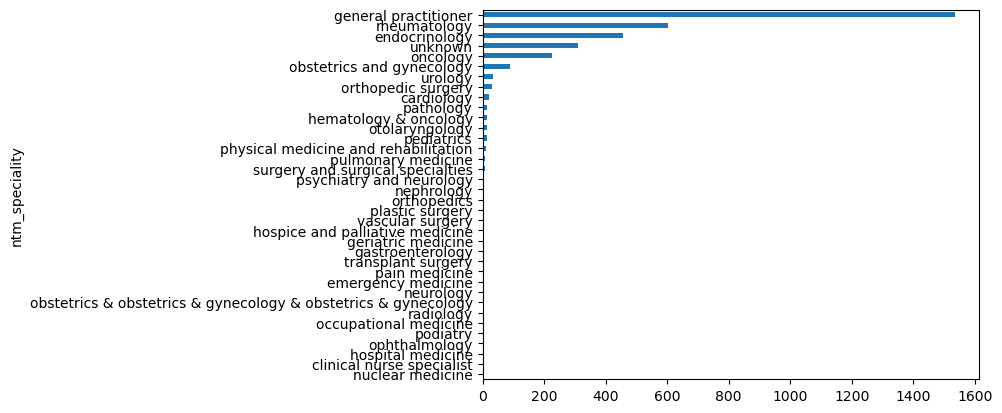

In [61]:
df_lower['ntm_speciality'].value_counts().sort_values(ascending=True).plot(kind='barh')

In [75]:
df_lower['count_of_risks'].value_counts().sort_index()

count_of_risks
0     970
1    1242
2     781
3     317
4      91
5      15
6       6
7       2
Name: count, dtype: int64

Correlation Matrix (Heatmap)

In [83]:
# Assuming your DataFrame is named df
# Calculate the correlation matrix

df = pd.get_dummies(df_lower, columns=['gender', 'race', 'age_bucket'], drop_first=True)
correlation_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

ValueError: could not convert string to float: 'p1'